**Nama  : Muhammad Bagus Indrawan**

**Kelas : TI-3A/20**

**NIM   : 2241720217**

# Jobsheet 6 : Ensemble Learning
## Tugas Praktikum

Tugas 1

Terdapat dataset mushroom. Berdasarkan dataset yang tersebut, bandingkan peforma antara algoritma Decision Tree dan RandomForest. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

Tugas 2

Terdapat dataset mushroom. Berdasarkan dataset tersebut, bandingkan peforma antara algoritma Decision Tree dan AdaBoost. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

Tugas 3

Dengan menggunakan dataset diabetes, buatlah ensemble voting dengan algoritma

  - Logistic Regression

  - SVM kernel polynomial

  - Decission Tree

Anda boleh melakukan eksplorasi dengan melakukan tunning hyperparameter

### Tugas 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import RandomForestClassifier # import RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
# Load data
df = pd.read_csv('mushrooms.csv')

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Cek kolom null
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
class_count = df['class'].value_counts()
print(class_count)

class
e    4208
p    3916
Name: count, dtype: int64


In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
# Seleksi fitur
X = df.loc[:, 'cap-shape':'habitat']
y = df['class']

X = pd.get_dummies(X, dtype=int)
y = pd.get_dummies(y, dtype=int)

In [7]:
# Menghitung class ratio
class_ratio = {class_label: count/len(y) for class_label, count in class_count.items()}

print('Class distribution :')
for class_label, count in class_count.items():
    print(f'Class {class_label}: {count} samples ({class_ratio[class_label]*100:.2f}% of total)')


Class distribution :
Class e: 4208 samples (51.80% of total)
Class p: 3916 samples (48.20% of total)


In [8]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# a. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f'Decision Tree accuracy: {dt_accuracy:.4f}')

Decision Tree accuracy: 1.0000


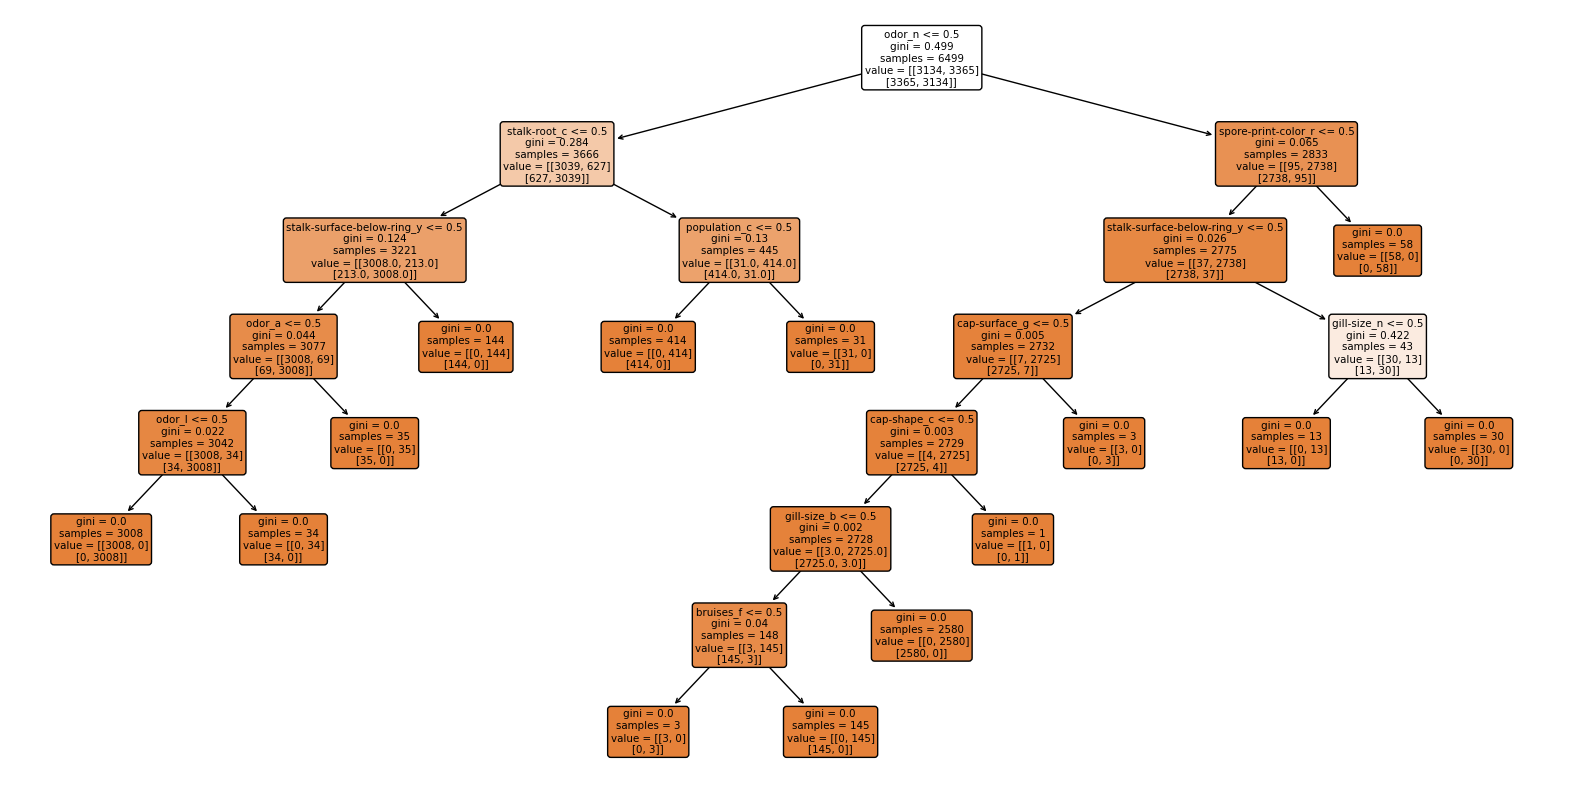

In [10]:
# Gambar Decision Tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['edible', 'poisonous'], rounded=True)
plt.show()

In [11]:
# b. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest accuracy: {rf_accuracy:.4f}')

Random Forest accuracy: 1.0000


### Tugas 2

In [12]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import AdaBoostClassifier # import AdaBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder # Kebutuhan encoding label

Load data, seleksi fitur, cek distribusi data, Menghitung class ratio, dan split data sudah dilakukan di Tugas 1, pada tugas 2, kita langsung saja membandingkan performa antara algoritma Decision Tree dan AdaBoost.

In [13]:
# a. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f'Decision Tree accuracy: {dt_accuracy:.4f}')

Decision Tree accuracy: 1.0000


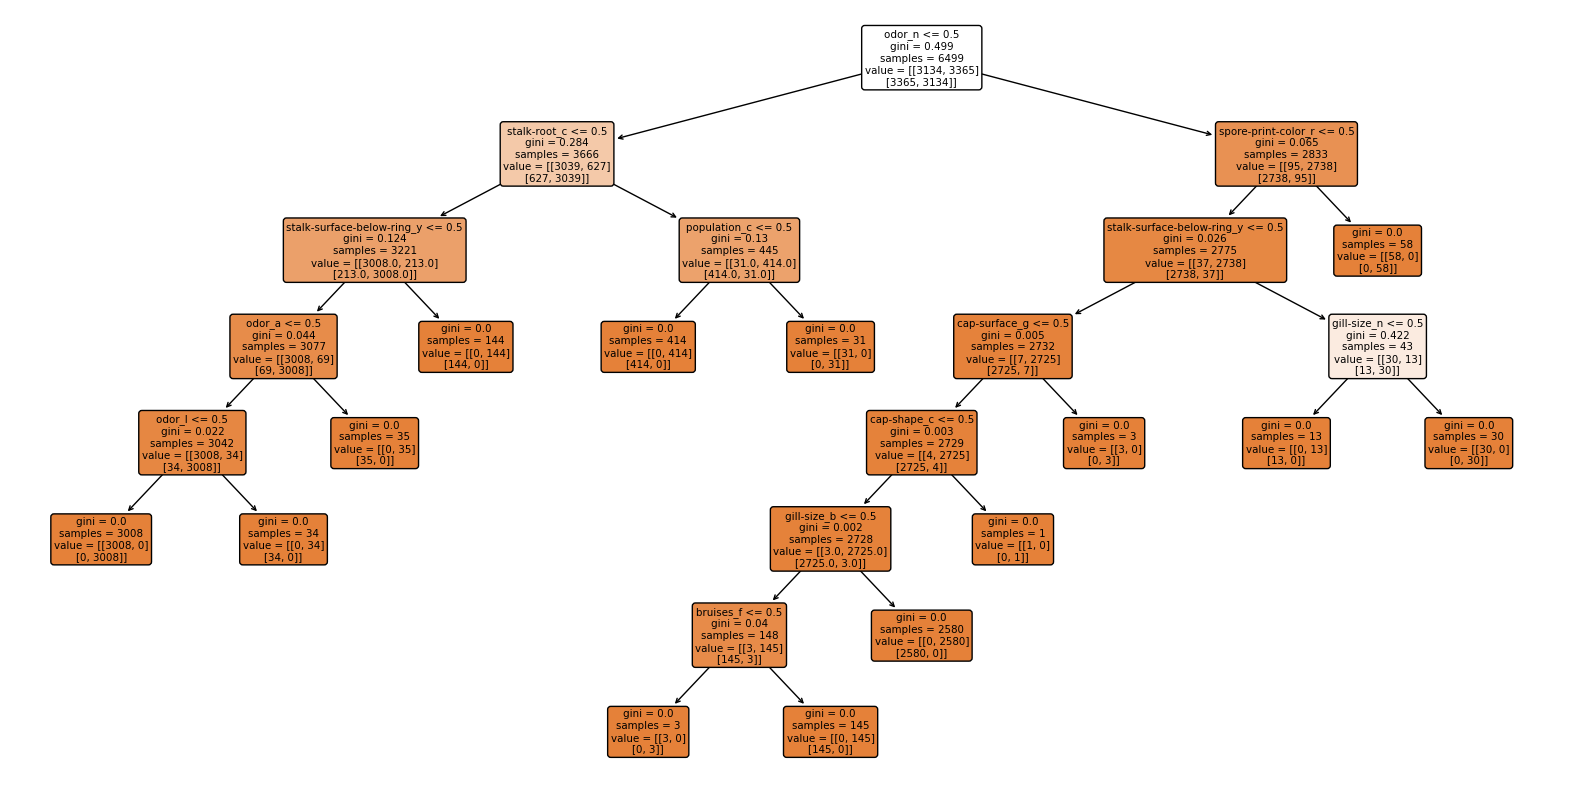

In [14]:
# Gambar Decision Tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['edible', 'poisonous'], rounded=True)
plt.show()

In [15]:
# b. AdaBoost
ada = AdaBoostClassifier(n_estimators=50)
y_train_1d = y_train['e'].values
ada.fit(X_train, y_train_1d)
y_pred_test_ada = ada.predict(X_test)
y_test_1d = y_test['e'].values
acc_ada_test = accuracy_score(y_test_1d, y_pred_test_ada)
print(f"AdaBoost accuracy: {acc_ada_test:.4f}")

c:\Users\INDRA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost accuracy: 1.0000


### Tugas 3

In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression # import Logistic Regression
from sklearn.svm import SVC # import SVM classifier
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import VotingClassifier # import model Voting
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [17]:
# Load data
df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# Cek kolom null
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
# Cek kolom bernilai 0
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in feature_columns:
    print("-----------------------------------------------")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

-----------------------------------------------
Pregnancies ==> Missing zeros : 111
-----------------------------------------------
Glucose ==> Missing zeros : 5
-----------------------------------------------
BloodPressure ==> Missing zeros : 35
-----------------------------------------------
SkinThickness ==> Missing zeros : 227
-----------------------------------------------
Insulin ==> Missing zeros : 374
-----------------------------------------------
BMI ==> Missing zeros : 11
-----------------------------------------------
DiabetesPedigreeFunction ==> Missing zeros : 0
-----------------------------------------------
Age ==> Missing zeros : 0


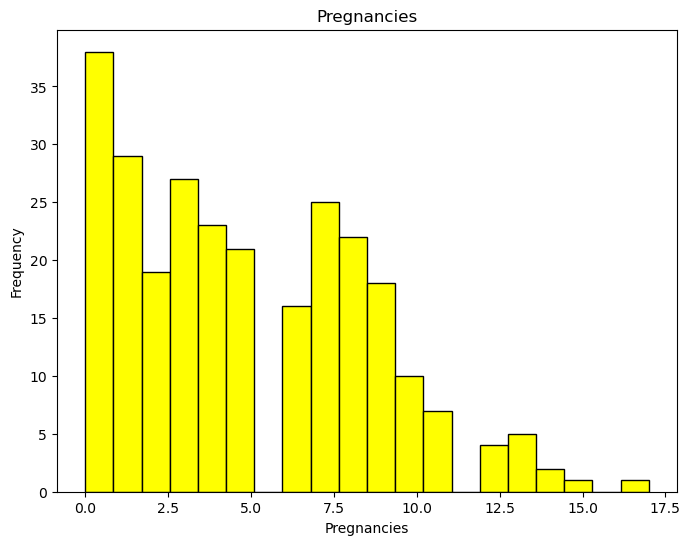

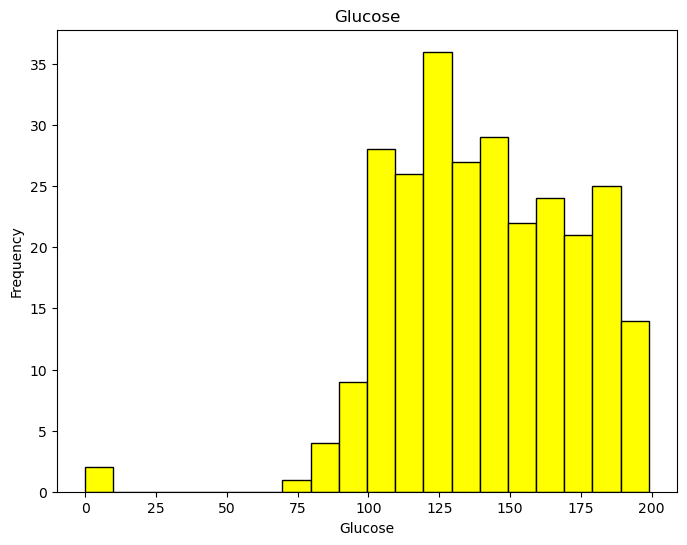

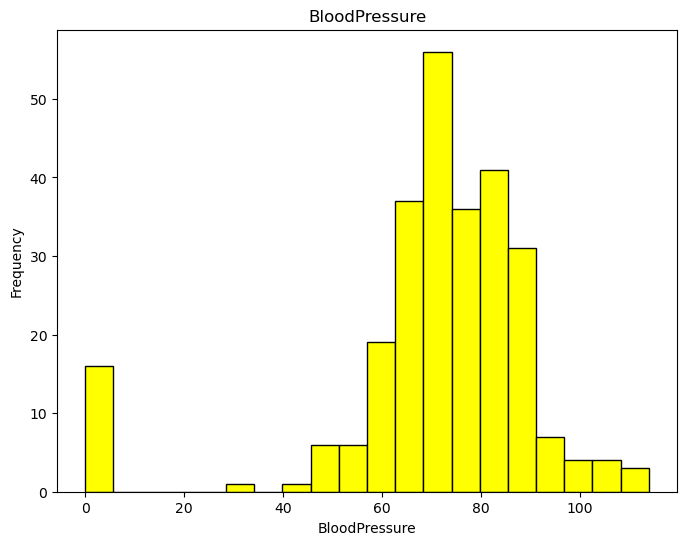

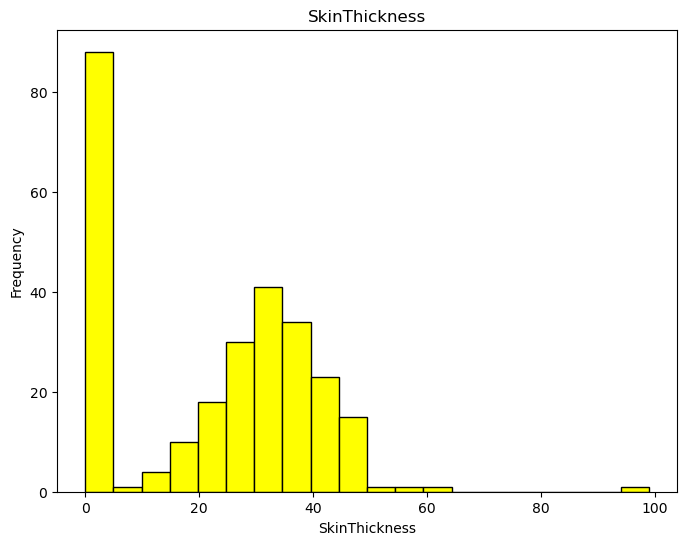

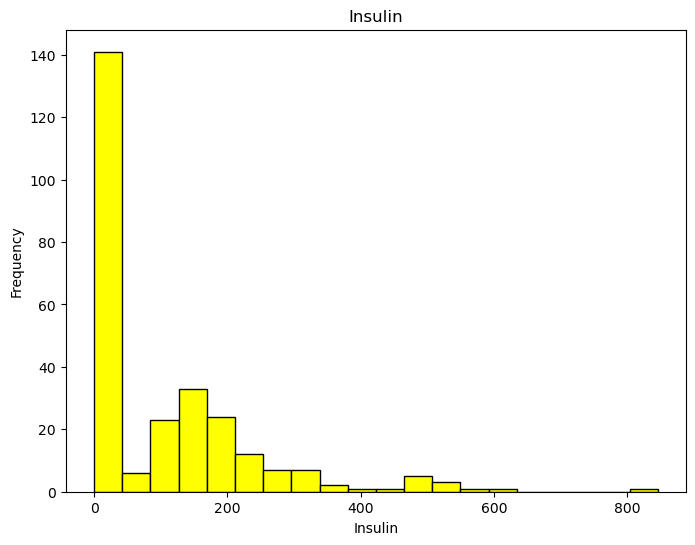

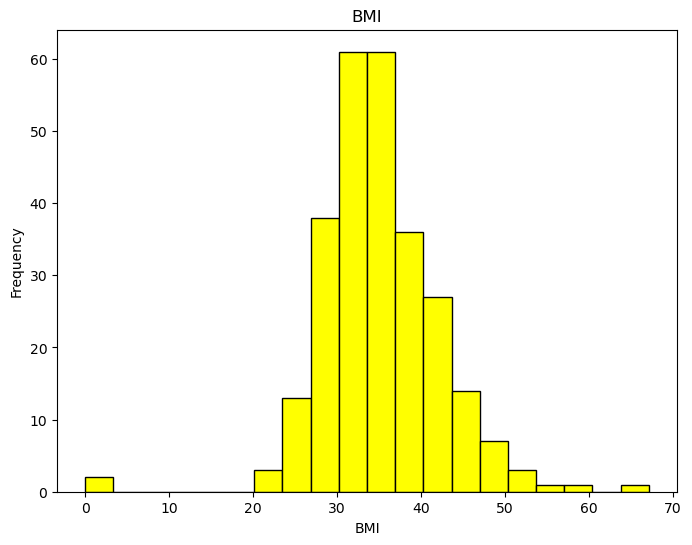

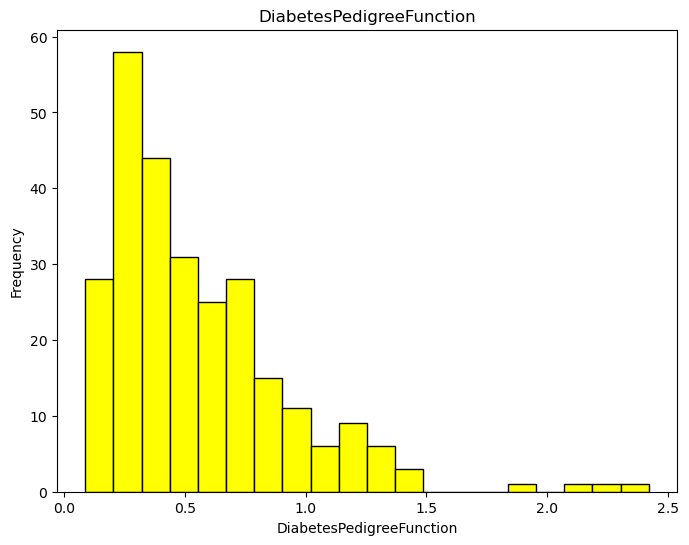

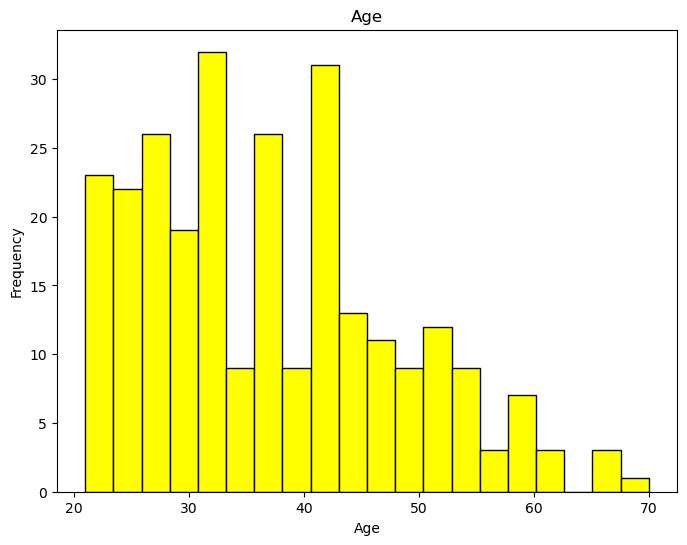

In [28]:
import matplotlib.pyplot as plt

# Loop through each feature and create a histogram
for feature in feature_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[df['Outcome'] == 1][feature], bins=20, color='yellow', edgecolor='black')
    plt.title(f'{feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [21]:
X = df[feature_columns]
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Definisikan model
clf1 = LogisticRegression(max_iter=1000)
clf2 = SVC(kernel='poly')
clf3 = DecisionTreeClassifier()

# Fit tiap model secara individu
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

# Prediksi untuk tiap algoritma di test set
pred_log_reg_test = clf1.predict(X_test)
pred_svm_test = clf2.predict(X_test)
pred_dt_test = clf3.predict(X_test)

# Prediksi untuk tiap algoritma di train set
pred_log_reg_train = clf1.predict(X_train)
pred_svm_train = clf2.predict(X_train)
pred_dt_train = clf3.predict(X_train)

acc_pred_log_reg = accuracy_score(y_test, pred_log_reg_test)
acc_pred_svm = accuracy_score(y_test, pred_svm_test)
acc_pred_dt = accuracy_score(y_test, pred_dt_test)

acc_pred_log_reg_train = accuracy_score(y_train, pred_log_reg_train)
acc_pred_svm_train = accuracy_score(y_train, pred_svm_train)
acc_pred_dt_train = accuracy_score(y_train, pred_dt_train)

print(f"Logistic Regression accuracy: {acc_pred_log_reg:.4f} (train: {acc_pred_log_reg_train:.4f})")
print(f"SVM accuracy: {acc_pred_svm:.4f} (train: {acc_pred_svm_train:.4f})")
print(f"Decision Tree accuracy: {acc_pred_dt:.4f} (train: {acc_pred_dt_train:.4f})")



Logistic Regression accuracy: 0.7468 (train: 0.7704)
SVM accuracy: 0.7597 (train: 0.7671)
Decision Tree accuracy: 0.7597 (train: 1.0000)


In [22]:
# Definisikan algoritma yang akan digunakan untuk voting
clf1 = LogisticRegression(max_iter=1000)
clf2 = SVC(kernel='poly')
clf3 = DecisionTreeClassifier()

# model hard voting
voting = VotingClassifier(estimators=[('LogisticRegression', clf1), ('SVM-Polynomial', clf2), ('DecisionTree', clf3)], voting='hard')

# Fit model
voting.fit(X_train, y_train)

# Prediksi
y_pred_vt1 = voting.predict(X_test)

# Evaluasi akurasi testing data
acc_vt1 = accuracy_score(y_test, y_pred_vt1)

# Print hasil evaluasi
print('Voting Hard')
print(f"Test set accuracy: {acc_vt1*100:.2f}%")

# Prediksi train
y_pred_train_vt1 = voting.predict(X_train)

# Evaluasi akurasi train data
acc_train_vt1 = accuracy_score(y_train, y_pred_train_vt1)

# Print hasil evaluasi
print(f"Train set accuracy: {acc_train_vt1*100:.2f}%")

Voting Hard
Test set accuracy: 77.92%
Train set accuracy: 81.43%
